In [ ]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 박스 플롯 hue 구현 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
tips = sns.load_dataset('tips')

# 데이터 준비
days = tips['day'].unique()
smokers = tips['smoker'].unique()

plt.figure(figsize=(8, 5))

# 각 day와 smoker 그룹별로 박스플롯 그리기
positions = []
data_to_plot = []
pos = 1

for day in sorted(days):  # day 순서대로
    for smoker in sorted(smokers):  # smoker = No, Yes
        group = tips[(tips['day'] == day) & (tips['smoker'] == smoker)]['total_bill']
        data_to_plot.append(group)
        positions.append(pos)
        pos += 1
    pos += 1  # day 사이 간격

# 박스플롯 그리기
bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# 색상 채우기 (smoker 구분)
colors = ['lightblue', 'lightcoral'] * len(days)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x축 레이블: day 가운데 배치
xticks = []
xlabels = []
for i, day in enumerate(sorted(days)):
    xticks.append((i* (len(smokers)+1)) + 1.5)  # day 그룹의 중앙
    xlabels.append(day)

plt.xticks(xticks, xlabels)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title('Total Bill Distribution by Day and Smoker')

# 범례 추가
from matplotlib.patches import Patch
legend_handles = [Patch(color='lightblue', label='No'),
                  Patch(color='lightcoral', label='Yes')]
plt.legend(handles=legend_handles, title="smoker")

plt.show()

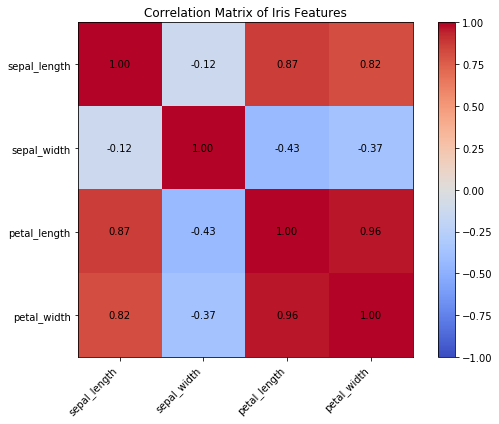

In [49]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 heatmap 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
iris = sns.load_dataset('iris')

# 수치형 변수 간 상관계수 계산
corr = iris.corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# imshow로 색상 맵 시각화
cax = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름으로 x, y축 라벨 설정
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# 각 셀에 상관계수 값 표시
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black')

# 컬러바 추가
fig.colorbar(cax)

plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. 정규분포를 따르는 데이터 생성
np.random.seed(0)
normal_data = np.random.normal(loc=10, scale=2, size=100)

# 2. 정규분포를 따르지 않는 데이터 생성 (균등 분포)
uniform_data = np.random.uniform(low=0, high=20, size=100)

In [5]:
# 정규분포 데이터에 대한 검정
shapiro_stat_normal, shapiro_p_normal = stats.shapiro(normal_data)
print(f"--- Shapiro-Wilk Test on Normal Data ---")
print(f"Statistic: {shapiro_stat_normal:.4f}, p-value: {shapiro_p_normal:.4f}")
if shapiro_p_normal > 0.05:
    print("귀무가설 기각 실패: 데이터는 정규분포를 따릅니다.")
else:
    print("귀무가설 기각: 데이터는 정규분포를 따르지 않습니다.")

# 균등분포 데이터에 대한 검정
shapiro_stat_uniform, shapiro_p_uniform = stats.shapiro(uniform_data)
print(f"\n--- Shapiro-Wilk Test on Uniform Data ---")
print(f"Statistic: {shapiro_stat_uniform:.4f}, p-value: {shapiro_p_uniform:.4f}")
if shapiro_p_uniform > 0.05:
    print("귀무가설 기각 실패: 데이터는 정규분포를 따릅니다.")
else:
    print("귀무가설 기각: 데이터는 정규분포를 따르지 않습니다.")


--- Shapiro-Wilk Test on Normal Data ---
Statistic: 0.9927, p-value: 0.8689
귀무가설 기각 실패: 데이터는 정규분포를 따릅니다.

--- Shapiro-Wilk Test on Uniform Data ---
Statistic: 0.9574, p-value: 0.0026
귀무가설 기각: 데이터는 정규분포를 따르지 않습니다.


In [15]:
# 정규분포 데이터에 대한 검정
ks_stat_normal, ks_p_normal = stats.kstest(normal_data, 'norm', args=(normal_data.mean(), normal_data.std(ddof=1)))
print(f"--- K-S Test on Normal Data ---")
print(f"Statistic: {ks_stat_normal:.4f}, p-value: {ks_p_normal:.4f}")

# 균등분포 데이터에 대한 검정
ks_stat_uniform, ks_p_uniform = stats.kstest(uniform_data, 'norm', args=(uniform_data.mean(), uniform_data.std(ddof=1)))
print(f"\n--- K-S Test on Uniform Data ---")
print(f"Statistic: {ks_stat_uniform:.4f}, p-value: {ks_p_uniform:.4f}")

# 두 데이터 비교
ks_stat, ks_p = stats.kstest(normal_data, uniform_data)
print(f"\n--- K-S Test on Each Two Data ---")
print(f"Statistic: {ks_stat:.4f}, p-value: {ks_p:.4f}")

--- K-S Test on Normal Data ---
Statistic: 0.0643, p-value: 0.7778

--- K-S Test on Uniform Data ---
Statistic: 0.0830, p-value: 0.4712

--- K-S Test on Each Two Data ---
Statistic: 0.3200, p-value: 0.0001


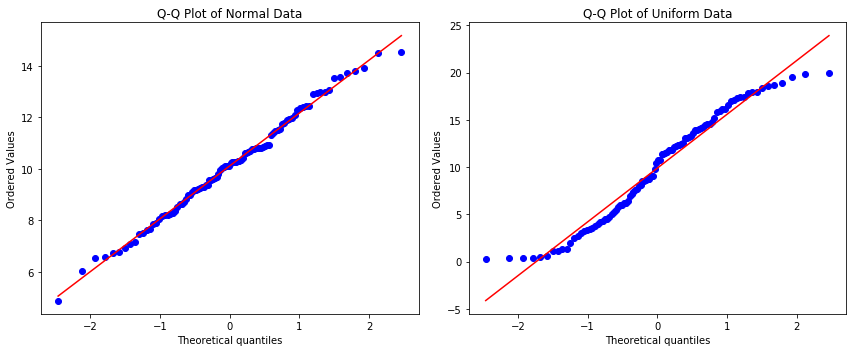

In [14]:
plt.figure(figsize=(12, 5))

# 정규분포 데이터의 Q-Q Plot
plt.subplot(1, 2, 1)
stats.probplot(normal_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Normal Data")

# 균등분포 데이터의 Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(uniform_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Uniform Data")

plt.tight_layout()
plt.show()

In [16]:
import numpy as np
from scipy import stats

np.random.seed(0)

# 1. 등분산을 만족하는 두 그룹 (분산이 비슷함)
group1_equal_var = np.random.normal(loc=5, scale=2, size=50)
group2_equal_var = np.random.normal(loc=5, scale=2.2, size=50)

# 2. 이분산을 만족하는 두 그룹 (분산이 다름)
group1_unequal_var = np.random.normal(loc=5, scale=2, size=50)
group2_unequal_var = np.random.normal(loc=5, scale=4, size=50)

# 3. 정규분포를 따르지 않는 데이터 (비교용)
group3_non_normal = np.random.uniform(low=0, high=10, size=50)

In [17]:
# 등분산 데이터에 대한 검정
levene_stat_equal, levene_p_equal = stats.levene(group1_equal_var, group2_equal_var)
print("-- Levene's Test on Equal Variance Data --")
print(f"Statistic: {levene_stat_equal:.4f}, p-value: {levene_p_equal:.4f}")
if levene_p_equal > 0.05:
    print("귀무가설 기각 실패: 그룹 간 분산은 동일합니다 (등분산성).")
else:
    print("귀무가설 기각: 그룹 간 분산은 다릅니다 (이분산성).")

# 이분산 데이터에 대한 검정
levene_stat_unequal, levene_p_unequal = stats.levene(group1_unequal_var, group2_unequal_var)
print("\n-- Levene's Test on Unequal Variance Data --")
print(f"Statistic: {levene_stat_unequal:.4f}, p-value: {levene_p_unequal:.4f}")
if levene_p_unequal > 0.05:
    print("귀무가설 기각 실패: 그룹 간 분산은 동일합니다 (등분산성).")
else:
    print("귀무가설 기각: 그룹 간 분산은 다릅니다 (이분산성).")

-- Levene's Test on Equal Variance Data --
Statistic: 1.0442, p-value: 0.3094
귀무가설 기각 실패: 그룹 간 분산은 동일합니다 (등분산성).

-- Levene's Test on Unequal Variance Data --
Statistic: 21.8024, p-value: 0.0000
귀무가설 기각: 그룹 간 분산은 다릅니다 (이분산성).


In [18]:
# 등분산 데이터에 대한 검정
bartlett_stat_equal, bartlett_p_equal = stats.bartlett(group1_equal_var, group2_equal_var)
print("-- Bartlett's Test on Equal Variance Data --")
print(f"Statistic: {bartlett_stat_equal:.4f}, p-value: {bartlett_p_equal:.4f}")

# 이분산 데이터에 대한 검정
bartlett_stat_unequal, bartlett_p_unequal = stats.bartlett(group1_unequal_var, group2_unequal_var)
print("\n-- Bartlett's Test on Unequal Variance Data --")
print(f"Statistic: {bartlett_stat_unequal:.4f}, p-value: {bartlett_p_unequal:.4f}")

# 정규분포를 따르지 않는 데이터에 대한 검정 (Levene과 비교)
levene_stat_nn, levene_p_nn = stats.levene(group1_equal_var, group3_non_normal)
bartlett_stat_nn, bartlett_p_nn = stats.bartlett(group1_equal_var, group3_non_normal)
print("\n-- Tests on Non-normal Data --")
print(f"Levene p-value: {levene_p_nn:.4f}") # 등분산으로 판단 (올바른 판단)
print(f"Bartlett p-value: {bartlett_p_nn:.4f}") # 이분산으로 판단 (잘못된 판단 가능성)

-- Bartlett's Test on Equal Variance Data --
Statistic: 1.3237, p-value: 0.2499

-- Bartlett's Test on Unequal Variance Data --
Statistic: 20.2517, p-value: 0.0000

-- Tests on Non-normal Data --
Levene p-value: 0.0001
Bartlett p-value: 0.0093
